# Import Library
import library

In [67]:
!pip install --upgrade tensorflow
import seaborn as sns
import numpy as np
import pandas as pd
import math
import tensorflow as tf
import csv
import matplotlib.pyplot as plt

Requirement already up-to-date: tensorflow in d:\programdata\anaconda3\lib\site-packages
Requirement already up-to-date: wheel>=0.26 in d:\programdata\anaconda3\lib\site-packages (from tensorflow)
Requirement already up-to-date: protobuf>=3.3.0 in d:\programdata\anaconda3\lib\site-packages (from tensorflow)
  Using cached numpy-1.13.1-cp36-none-win_amd64.whl
Requirement already up-to-date: tensorflow-tensorboard<0.2.0,>=0.1.0 in d:\programdata\anaconda3\lib\site-packages (from tensorflow)
Requirement already up-to-date: six>=1.10.0 in d:\programdata\anaconda3\lib\site-packages (from tensorflow)
  Using cached setuptools-36.5.0-py2.py3-none-any.whl
Requirement already up-to-date: markdown>=2.6.8 in d:\programdata\anaconda3\lib\site-packages (from tensorflow-tensorboard<0.2.0,>=0.1.0->tensorflow)
Requirement already up-to-date: bleach==1.5.0 in d:\programdata\anaconda3\lib\site-packages (from tensorflow-tensorboard<0.2.0,>=0.1.0->tensorflow)
Requirement already up-to-date: werkzeug>=0.11

Exception:
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\shutil.py", line 544, in move
    os.rename(src, real_dst)
OSError: [WinError 17] The system cannot move the file to a different disk drive: 'd:\\programdata\\anaconda3\\lib\\site-packages\\numpy' -> 'C:\\Users\\Snowlaw\\AppData\\Local\\Temp\\pip-wlyrldt1-uninstall\\programdata\\anaconda3\\lib\\site-packages\\numpy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "D:\ProgramData\Anaconda3\lib\site-packages\pip\commands\install.py", line 342, in run
    prefix=options.prefix_path,
  File "D:\ProgramData\Anaconda3\lib\site-packages\pip\req\req_set.py", line 778, in install
    requirement.uninstall(auto_confirm=True)
  File "D:\ProgramData\Anaconda3\lib\site-packages\pip\req\req_install.py", line 754, in uninstall
    

In [68]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


# Import Training set and Test set of Titanic Survival

In [69]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

print('shape of train set :',train_set.shape)
print('shape of test set:', test_set.shape)

print(' ---- Null data in train set : ----\n', train_set.isnull().sum())
print(' ---- Null data in test set : ----\n', test_set.isnull().sum())

print(train_set.loc[range(20)])

shape of train set : (891, 12)
shape of test set: (418, 11)
 ---- Null data in train set : ----
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 ---- Null data in test set : ----
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2 

# Cleanse Data

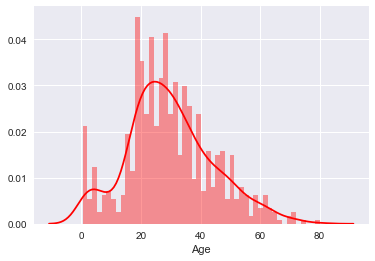

In [70]:
%matplotlib inline
age_plot = train_set.loc[np.logical_not(train_set['Age'].isnull()), ['Age']]
sns.distplot(age_plot, bins = 50, axlabel = 'Age', color="r")

In [72]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train_set_copy = train_set.copy()
train_set_copy = train_set_copy.drop(drop_elements, axis = 1)
train_set_copy = train_set_copy.drop(range(700), axis = 0)
print(train_set_copy)

     Survived  Pclass     Sex   Age  Parch      Fare Embarked
700         1       1  female  18.0      0  227.5250        C
701         1       1    male  35.0      0   26.2875        S
702         0       3  female  18.0      1   14.4542        C
703         0       3    male  25.0      0    7.7417        Q
704         0       3    male  26.0      0    7.8542        S
705         0       2    male  39.0      0   26.0000        S
706         1       2  female  45.0      0   13.5000        S
707         1       1    male  42.0      0   26.2875        S
708         1       1  female  22.0      0  151.5500        S
709         1       3    male   NaN      1   15.2458        C
710         1       1  female  24.0      0   49.5042        C
711         0       1    male   NaN      0   26.5500        S
712         1       1    male  48.0      0   52.0000        S
713         0       3    male  29.0      0    9.4833        S
714         0       2    male  52.0      0   13.0000        S
715     

In [85]:
print(train_set.Sex.map(lambda x: 0 if x == 'female' else 1))

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
